In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# 1. Data analysis

In [3]:
df = pd.read_csv('worldbank.csv')

In [4]:
df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Proportion of people living below 50 percent of median income (%) [SI.DST.50MD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL],People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS],"Population, total [SP.POP.TOTL]",GDP (current US$) [NY.GDP.MKTP.CD]
0,2018,YR2018,Afghanistan,AFG,14.20841885,71.33430481,491.337221382603,..,63.081,..,1.18922812944517,0.393489241600037,44.7775364052837,36743039.0,18053222687.4126
1,2018,YR2018,Albania,ALB,6.66844559,351.3012085,5365.48934672897,3.15294480323792,79.184,11.8,4.01934561695576,0.628666281700134,..,2866376.0,15379509891.7196
2,2018,YR2018,Algeria,DZA,6.38729763,266.46469116,4577.21029180491,5.81275129318237,76.066,..,1.40000000000002,0.531993925571442,84.3839771689143,42505035.0,194554483655.528
3,2018,YR2018,American Samoa,ASM,..,..,12552.0546868861,..,..,..,2.6711185308848,..,..,50908.0,639000000
4,2018,YR2018,Andorra,AND,7.37541723,3164.38842773,42819.7745797624,3.2467200756073,..,..,1.58876549046354,..,..,75162.0,3218419896.9641


In [5]:
# Some columns are unnecessary

df.drop(columns=['Time', 'Time Code'], inplace=True)

In [6]:
# For a better visibility, shortening of columns names

df.rename(columns={
    'Country Name': 'Country',
    'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]': 'Health expenditure (% GDP)',
    'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]': 'Health expenditure per capita (US $)',
    'GDP per capita (current US$) [NY.GDP.PCAP.CD]': 'GDP per capita (US $)',
    'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]': 'Education expenditure (% GDP)',
    'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]': 'Life expectancy (years)',
    'Proportion of people living below 50 percent of median income (%) [SI.DST.50MD]': 'People living below 50 percent of median income (%)',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'GDP growth (% annual)',
    'Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL]': 'Human capital index (HCI)',
    'People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS]': 'Basic handwashing facilities - soap and water (% of population)',
    'Population, total [SP.POP.TOTL]': 'Population, total',
    'GDP (current US$) [NY.GDP.MKTP.CD]': 'GDP (US $)',
    }, inplace=True)

In [7]:
df.head()

,Country,Country Code,Health expenditure (% GDP),Health expenditure per capita (US $),GDP per capita (US $),Education expenditure (% GDP),Life expectancy (years),People living below 50 percent of median income (%),GDP growth (% annual),Human capital index (HCI),Basic handwashing facilities - soap and water (% of population),"Population, total",GDP (US $)
0,Afghanistan,AFG,14.20841885,71.33430481,491.337221382603,..,63.081,..,1.18922812944517,0.393489241600037,44.7775364052837,36743039.0,18053222687.4126
1,Albania,ALB,6.66844559,351.3012085,5365.48934672897,3.15294480323792,79.184,11.8,4.01934561695576,0.628666281700134,..,2866376.0,15379509891.7196
2,Algeria,DZA,6.38729763,266.46469116,4577.21029180491,5.81275129318237,76.066,..,1.40000000000002,0.531993925571442,84.3839771689143,42505035.0,194554483655.528
3,American Samoa,ASM,..,..,12552.0546868861,..,..,..,2.6711185308848,..,..,50908.0,639000000
4,Andorra,AND,7.37541723,3164.38842773,42819.7745797624,3.2467200756073,..,..,1.58876549046354,..,..,75162.0,3218419896.9641


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country                                                          217 non-null    object 
 1   Country Code                                                     217 non-null    object 
 2   Health expenditure (% GDP)                                       217 non-null    object 
 3   Health expenditure per capita (US $)                             217 non-null    object 
 4   GDP per capita (US $)                                            217 non-null    object 
 5   Education expenditure (% GDP)                                    217 non-null    object 
 6   Life expectancy (years)                                          217 non-null    object 
 7   People living below 50 percent of median inc

In [9]:
# Theoretically, no missing values. In practice, NaN is represented by '..'. Let's fix it. 

df.replace('..', np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country                                                          217 non-null    object 
 1   Country Code                                                     217 non-null    object 
 2   Health expenditure (% GDP)                                       187 non-null    object 
 3   Health expenditure per capita (US $)                             187 non-null    object 
 4   GDP per capita (US $)                                            210 non-null    object 
 5   Education expenditure (% GDP)                                    166 non-null    object 
 6   Life expectancy (years)                                          209 non-null    object 
 7   People living below 50 percent of median inc

In [11]:
# 2. Data cleaning

In [12]:
# Now, it is visible that some columns are filled partially, in some cases only by 30%. It makes no sense to remove or artificially fill them,
# what will significantly affect the data for modelling. There are also still text columns, which should not be necessary. Let's remove a few of them. 

dfu = df.drop(columns=[
    'People living below 50 percent of median income (%)',
    'Basic handwashing facilities - soap and water (% of population)',
    'Country',
    'Country Code',
    'Health expenditure per capita (US $)',
    'GDP per capita (US $)',
    ])

In [13]:
dfu.head()

,Health expenditure (% GDP),Education expenditure (% GDP),Life expectancy (years),GDP growth (% annual),Human capital index (HCI),"Population, total",GDP (US $)
0,14.20841885,NaN,63.081,1.18922812944517,0.393489241600037,36743039.0,18053222687.4126
1,6.66844559,3.15294480323792,79.184,4.01934561695576,0.628666281700134,2866376.0,15379509891.7196
2,6.38729763,5.81275129318237,76.066,1.40000000000002,0.531993925571442,42505035.0,194554483655.528
3,NaN,NaN,NaN,2.6711185308848,NaN,50908.0,639000000
4,7.37541723,3.2467200756073,NaN,1.58876549046354,NaN,75162.0,3218419896.9641


In [14]:
# There are NaN values in our target. Let's remove them with affected rows.

dfu.dropna(subset='Life expectancy (years)', inplace=True)

In [15]:
# Data is not numeric, what should be changed before further operation.

dfu = dfu.apply(pd.to_numeric, errors='coerce')

In [16]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Health expenditure (% GDP)     183 non-null    float64
 1   Education expenditure (% GDP)  163 non-null    float64
 2   Life expectancy (years)        209 non-null    float64
 3   GDP growth (% annual)          202 non-null    float64
 4   Human capital index (HCI)      166 non-null    float64
 5   Population, total              209 non-null    float64
 6   GDP (US $)                     202 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB


In [17]:
# NaN values should be removed or filled. This time, we are removing all rows containing NaN and reducing the size of a dataset, in order to see how
# it will affect the model performance.

dfu.dropna(how='any', inplace=True)

In [18]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1 to 216
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Health expenditure (% GDP)     143 non-null    float64
 1   Education expenditure (% GDP)  143 non-null    float64
 2   Life expectancy (years)        143 non-null    float64
 3   GDP growth (% annual)          143 non-null    float64
 4   Human capital index (HCI)      143 non-null    float64
 5   Population, total              143 non-null    float64
 6   GDP (US $)                     143 non-null    float64
dtypes: float64(7)
memory usage: 8.9 KB


In [19]:
# 3. Data exploration

In [20]:
dfu.describe()

,Health expenditure (% GDP),Education expenditure (% GDP),Life expectancy (years),GDP growth (% annual),Human capital index (HCI),"Population, total",GDP (US $)
count,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,6.443204,4.365551,72.706015,3.438979,0.575035,4.891060e+07,5.759628e+11
std,2.641871,1.844453,7.653465,2.463353,0.146624,1.684340e+08,2.167759e+12
min,1.897636,0.419998,52.554000,-3.363688,0.299029,4.700800e+04,2.335147e+08
25%,4.284983,3.152431,66.508500,1.883946,0.454720,3.297594e+06,1.475480e+10
50%,6.310000,4.179490,73.802000,3.479439,0.578217,1.017521e+07,5.490152e+10
75%,8.284938,5.233260,78.650512,4.974670,0.706778,3.159737e+07,3.341023e+11
max,16.629644,15.377000,84.210976,8.776224,0.887084,1.402760e+09,2.065652e+13


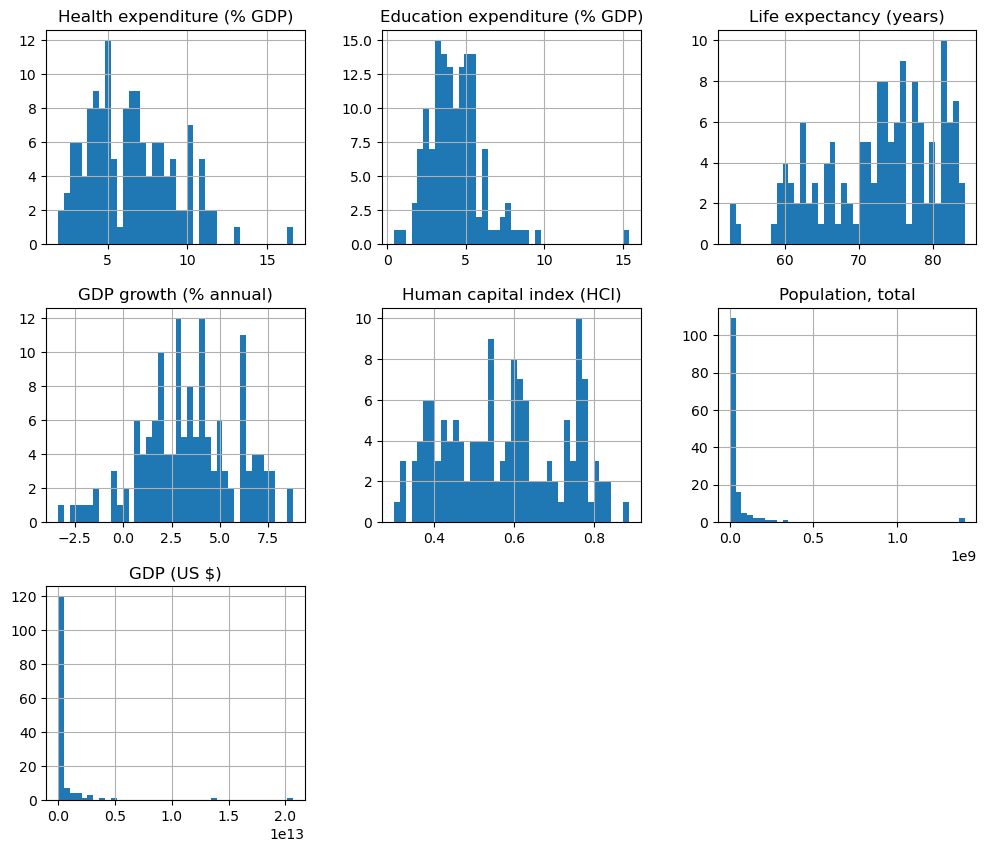

In [21]:
# Histograms shows close to normal distribution for a few features. In some of them (population or GDP) differences between border values are so high
# that the axis scale cannot reflect those differences in a visible way. It is also proven by standard deviation values shown in the table.

dfu.hist(bins=40, figsize=(12,10))
plt.show()

In [22]:
corr_matrix = dfu.corr()

In [23]:
# It is useful to check what the correlation of parameters looks like. Our label (target value) is life expectancy.

corr_matrix['Life expectancy (years)'].sort_values(ascending=False)

Life expectancy (years)          1.000000
Human capital index (HCI)        0.891549
Health expenditure (% GDP)       0.446059
GDP (US $)                       0.205108
Education expenditure (% GDP)    0.157771
Population, total                0.013356
GDP growth (% annual)           -0.125979
Name: Life expectancy (years), dtype: float64

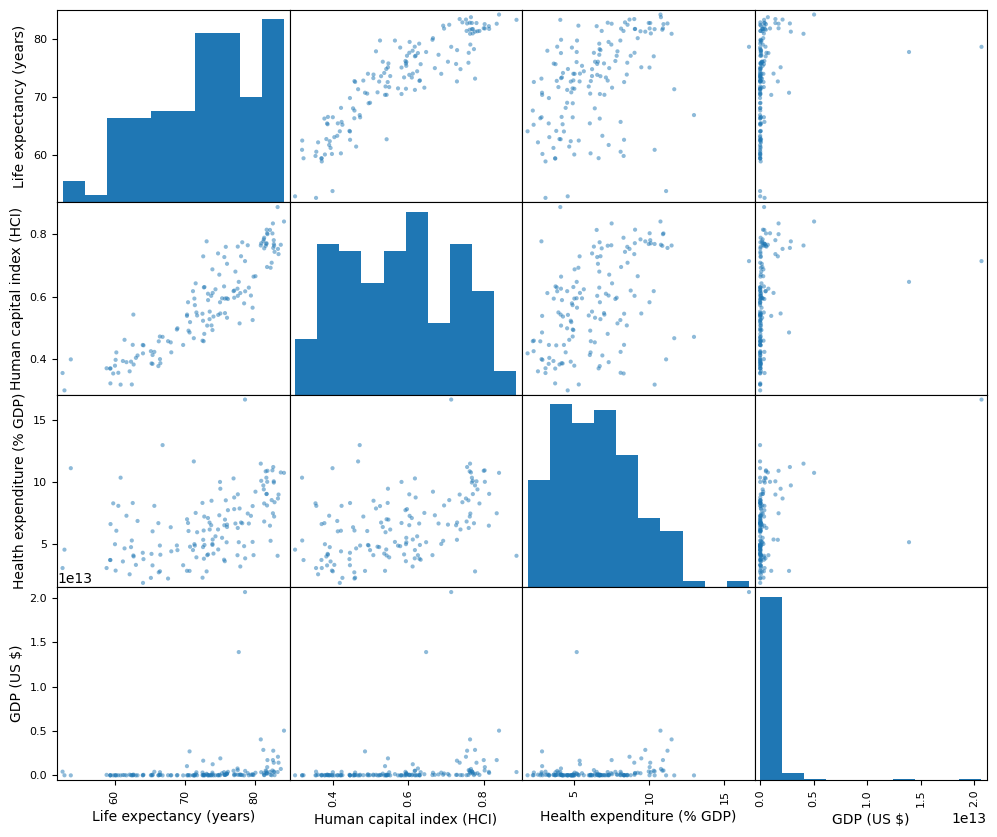

In [24]:
# The highest correlation exists for HCI. There are also 3 others with positive sign and significantly lower value. 

feature_list = [
    'Life expectancy (years)',
    'Human capital index (HCI)',
    'Health expenditure (% GDP)',
    'GDP (US $)',
    ]

scatter_matrix(dfu[feature_list], figsize=(12, 10))
plt.show()

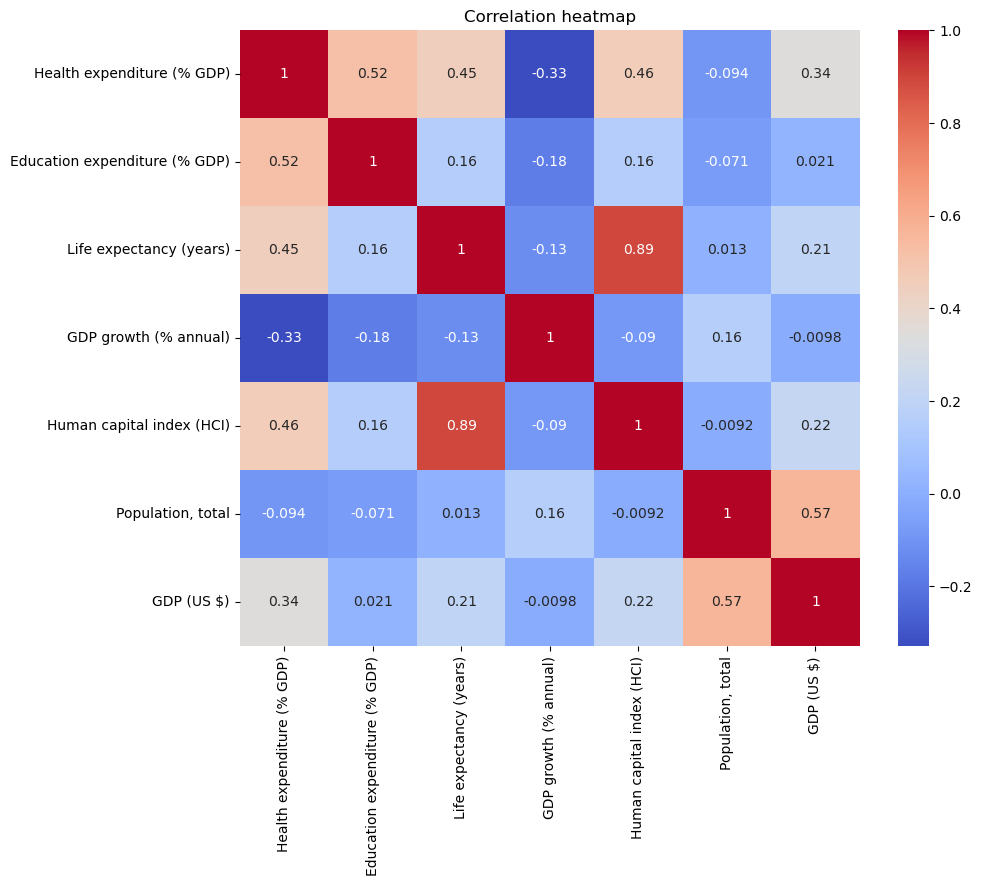

In [25]:
# Heatmap is also a great tool for visualising correlations. There are also a few more visible correlations.

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

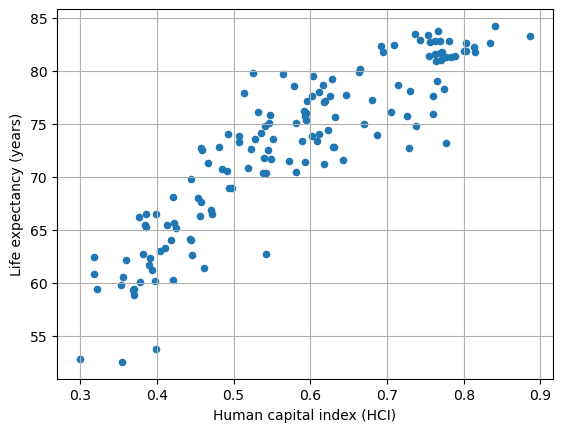

In [26]:
# Looking into the detailed view of the highest ranked parameter, it is visible that figures are strongly related. 

dfu.plot(kind='scatter', x='Human capital index (HCI)', y='Life expectancy (years)', grid=True)
plt.show()

In [27]:
# 4. Model training and evaluation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [29]:
# 4.1 Full features model

In [30]:
# Selection of the label and features.

X = dfu.drop('Life expectancy (years)', axis=1)
y = dfu['Life expectancy (years)']

In [31]:
# Split of data in ratio 0.8/0.2 for training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Training a regression model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [33]:
# Preparation of predictions

linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:10].round(0))

[79. 80. 77. 75. 60. 82. 63. 63. 65. 71.]


In [34]:
# Actual values for a comparison. It seems that not all the values are close to the prediction at first glance.

print(y_test[:10].values.round(0))

[82. 83. 75. 76. 53. 82. 66. 63. 60. 74.]


In [35]:
# Relative errors of prediction (by %). In general, values are low (which is good), but there are some bigger outliners in the list.

relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print(relative_errors.values.round(2))

[ 3.92  3.64  3.09  2.2  13.78  0.42  4.93  0.97  8.54  4.    3.44  4.46
  3.39  0.82  4.42  6.09  3.33  1.64  2.98  2.17 11.34  7.05  0.93  6.86
  5.3   4.56  4.67  2.99  3.  ]


In [36]:
# R squared parameter. Value for the train set means that 80% of the dependent variable variation is explained by the model. Value for the test
# set is similar, 78% of the variation was explained by the model. The value is not so high to interpret it directly as an overfitting.

train_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)
print(f'r2 train: {train_score}')
print(f'r2 test: {test_score}')

r2 train: 0.8018288494903624
r2 test: 0.784384179021284


In [37]:
# RMSE for the train set shows 3.4 years of difference in prediction of the correct value. The value for test set is similar, 3.5 years.
# There are no signs of overfitting or underfitting.

rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(f'rmse train: {rmse_train}')
print(f'rmse test: {rmse_test}')

rmse train: 3.388756995879414
rmse test: 3.519462965949931


In [38]:
# 4.2 Single feature model

In [39]:
# Training a simplified model with one feature

X_train_HCI = X_train[['Human capital index (HCI)']]
X_test_HCI = X_test[['Human capital index (HCI)']]
linear_model_simp1 = LinearRegression()
linear_model_simp1.fit(X_train_HCI, y_train)

LinearRegression()

In [40]:
# Preparation of predictions

simp1_predictions_train = linear_model_simp1.predict(X_train_HCI)
simp1_predictions_test = linear_model_simp1.predict(X_test_HCI)

In [41]:
# Values of those R squared parameters are similar, slightly lower than the values from the full model. This shows normal behavior of the model.

train_score_simp1 = linear_model_simp1.score(X_train_HCI, y_train)
test_score_simp1 = linear_model_simp1.score(X_test_HCI, y_test)
print(f'r2 train: {train_score_simp1}')
print(f'r2 test: {test_score_simp1}')

r2 train: 0.7976652335630409
r2 test: 0.7778683138354765


In [42]:
# RMSE values are similar as well. This confirms the statements described for R squared. It shows that the simplest model with one parameter delivers
# slightly worse performance than more complex one with more features.

rmse_train_simp1 = root_mean_squared_error(y_train, simp1_predictions_train)
rmse_test_simp1 = root_mean_squared_error(y_test, simp1_predictions_test)
print(f'rmse train: {rmse_train_simp1}')
print(f'rmse test: {rmse_test_simp1}')

rmse train: 3.424171182710538
rmse test: 3.5722458805731145


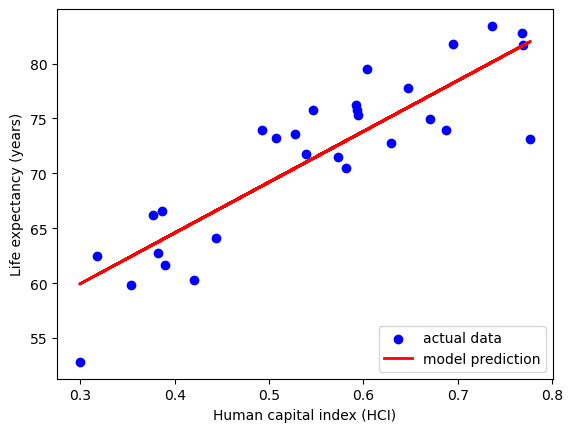

In [43]:
# The chart shows a good fit of the model to the dataset.

plt.scatter(X_test_HCI, y_test, color='blue', label='actual data')
plt.plot(X_test_HCI, simp1_predictions_test, color='red', linewidth=2, label='model prediction')
plt.xlabel('Human capital index (HCI)')
plt.ylabel('Life expectancy (years)')
plt.legend(loc='lower right')
plt.show()

In [44]:
# 4.3 Single feature model - different scenario

In [45]:
# Training a simplified model with one feature - second in terms of correlation

X_train_Hexp = X_train[['Health expenditure (% GDP)']]
X_test_Hexp = X_test[['Health expenditure (% GDP)']]
linear_model_simp2 = LinearRegression()
linear_model_simp2.fit(X_train_Hexp, y_train)

LinearRegression()

In [46]:
# Preparation of predictions

simp2_predictions_train = linear_model_simp2.predict(X_train_Hexp)
simp2_predictions_test = linear_model_simp2.predict(X_test_Hexp)

In [47]:
# Values of those R squared parameters are poor. This model cannot predict correct values for the label, based on this chosen feature.

train_score_simp2 = linear_model_simp2.score(X_train_Hexp, y_train)
test_score_simp2 = linear_model_simp2.score(X_test_Hexp, y_test)
print(f'r2 train: {train_score_simp2}')
print(f'r2 test: {test_score_simp2}')

r2 train: 0.2056709496319229
r2 test: 0.14647322305221966


In [48]:
# RMSE values are high and significantly higher than for previous models. In fact, they are the same as the standard deviation of the label. 

rmse_train_simp2 = root_mean_squared_error(y_train, simp2_predictions_train)
rmse_test_simp2 = root_mean_squared_error(y_test, simp2_predictions_test)
print(f'rmse train: {rmse_train_simp2}')
print(f'rmse test: {rmse_test_simp2}')

rmse train: 6.784540429020337
rmse test: 7.002363676653124


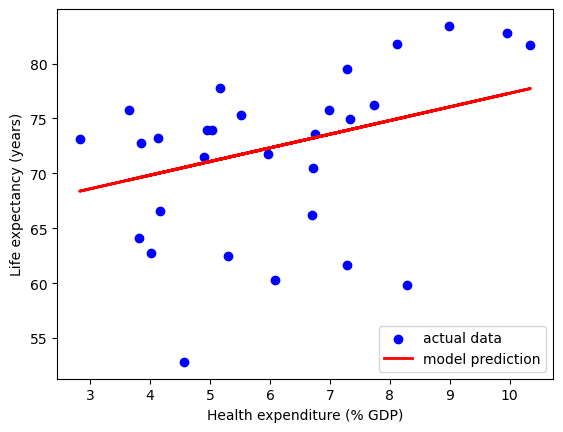

In [49]:
# Model prediction does not fit to the actual data.

plt.scatter(X_test_Hexp, y_test, color='blue', label='actual data')
plt.plot(X_test_Hexp, simp2_predictions_test, color='red', linewidth=2, label='model prediction')
plt.xlabel('Health expenditure (% GDP)')
plt.ylabel('Life expectancy (years)')
plt.legend(loc='lower right')
plt.show()